In [1]:
from dataloader import GalaxyZooDataset
from mynn import MyCNN

import torch.nn as nn
import torch

import matplotlib.pyplot as plt

In [2]:
data_csv = "../data/training_solutions_rev1/training_solutions_rev1.csv"
root_dir = "../data/images_training_rev1"
my_dataset_train = GalaxyZooDataset(csv_file=data_csv, root_dir=root_dir, first_elem=0, last_elem=0.6)
my_dataset_validation = GalaxyZooDataset(csv_file=data_csv, root_dir=root_dir, first_elem=0.6, last_elem=0.8)
train_to_validation_ratio = int(len(my_dataset_train)/len(my_dataset_validation))
my_dataset_test = GalaxyZooDataset(csv_file=data_csv, root_dir=root_dir, first_elem=0.8, last_elem=1)

In [3]:
model_path = None

In [4]:
# save_model = True
save_model = False
if save_model:
    save_model_name = '../models/model_test3.pt'

In [5]:
if model_path:
    model = torch.load(model_path)
else:
    model = MyCNN()

In [6]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [7]:
import os
import time

os.getcwd()

'/home/sotnyk/sotnyk/UCU/III_year/ML/project/src'

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'tor

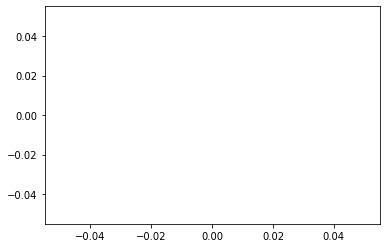

In [9]:
losses_train = []
losses_validation = []


# data_to_plot = {}

t = time.time()
print_interval = 500
try:
    for epoch in range(1):  # loop over the dataset multiple times

        running_loss_train = 0.0
        running_loss_validation = 0.0
#         for i in range(len(my_dataset_train)):
        for i in range(7000):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = my_dataset_train[i]

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            print(type(loss))

            # print statistics
            running_loss_train += loss.item()
#             !!!!!!!!!!!!!!!somewhere here is memory leak!!!!!!!!!!!!!!
#             if i % train_to_validation_ratio == 0:
#                 inputs, labels = my_dataset_validation[int(i/train_to_validation_ratio)]
#                 running_loss_validation += criterion(model(inputs), labels)*train_to_validation_ratio
            if i % train_to_validation_ratio == 0:
                inputs, labels = my_dataset_validation[int(i/train_to_validation_ratio)]
                running_loss_validation += criterion(model(inputs), labels).item()*train_to_validation_ratio
            
                
            if i % print_interval == print_interval-1:    # print every print_interval mini-batches
                print('[%d, %5d] loss train: %.3f' %
                      (epoch + 1, i + 1, running_loss_train / print_interval))
                print('[%d, %5d] loss validation: %.3f' %
                      (epoch + 1, i + 1, running_loss_validation / print_interval))
                
                print("i: ", i, "time: ", time.time() - t, "len losses_train:", len(losses_train), "len losses_validation:", len(losses_validation))
                losses_train.append(running_loss_train / print_interval)
                losses_validation.append(running_loss_validation / print_interval)
                running_loss_validation = 0.0
                running_loss_train = 0.0
    print('Finished Training')

except KeyboardInterrupt:
    print(i)
    
finally:
    print(time.time()-t)
    plt.plot(losses_train, label='')
    plt.show();
    if save_model:
        torch.save(model, save_model_name)
        
   